K=1 -> Acurácia: 0.7460
K=3 -> Acurácia: 0.7566
K=5 -> Acurácia: 0.7884
K=7 -> Acurácia: 0.8413
K=9 -> Acurácia: 0.8413
Melhor K: 7
Acurácia média na validação cruzada: 0.8233
Acurácia Final: 0.8413
Precisão: 0.7967
Recall: 0.9515
F1-Score: 0.8673
Matriz de Confusão:
[[61 25]
 [ 5 98]]
Especificidade: 0.7093


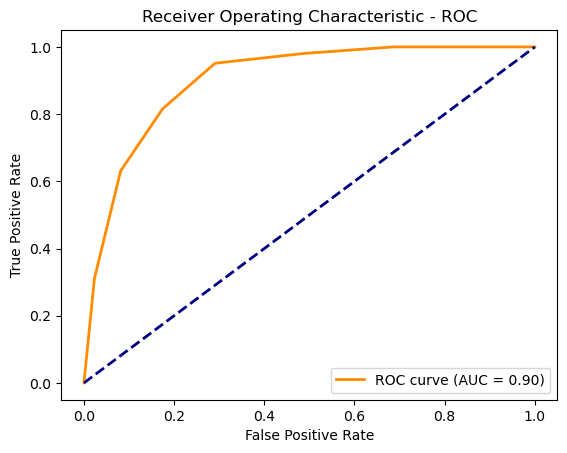

In [ ]:
# Teste de Performance 2 - NLP e KNN - Luiz Gabriel de Souza Coser

# >>> Atenção: Para evitar estouro de memória, o código abaixo usa apenas 5% da base de dados.
# >>> Quando for rodar com a base completa, REMOVA a linha de amostragem (df = df.sample(...))

# Importação de Bibliotecas
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Leitura dos dados
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

# Criação do campo 'text' (Título + Corpo da notícia)
fake_df["text"] = fake_df.iloc[:, 0].astype(str) + " " + fake_df.iloc[:, 1].astype(str)
true_df["text"] = true_df.iloc[:, 0].astype(str) + " " + true_df.iloc[:, 1].astype(str)

fake_df["label"] = 0
true_df["label"] = 1

# Selecionar apenas text e label
fake_df_final = fake_df[["text", "label"]]
true_df_final = true_df[["text", "label"]]

# Unir os datasets
df = pd.concat([fake_df_final, true_df_final], ignore_index=True)

# Amostragem de 5% dos dados para reduzir carga de memória (REMOVA ESSA LINHA PARA USAR 100%, MEU COMPUTADOR NÃO AGUENTOU RODAR)
df = df.sample(frac=0.05, random_state=42)

# Criação das features - TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df["text"].astype(str))
y = df["label"]

# Divisão Holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Teste de diferentes valores de K
k_values = [1, 3, 5, 7, 9]
accuracy_results = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'K={k} -> Acurácia: {acc:.4f}')
    accuracy_results[k] = acc

best_k = max(accuracy_results, key=accuracy_results.get)
print(f"Melhor K: {best_k}")

# Validação cruzada (se ainda travar, comente as 3 linhas abaixo)
best_knn = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')
print(f'Acurácia média na validação cruzada: {cv_scores.mean():.4f}')

# Avaliação final
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
print(f'Acurácia Final: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precisão: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred):.4f}')
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

# Curva ROC
y_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Cálculo da Especificidade
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidade = tn / (tn + fp)
print(f'Especificidade: {especificidade:.4f}')


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC')
plt.legend(loc="lower right")
plt.show()
